<a href="https://colab.research.google.com/github/Xavaitron/gdg_HM_Finvision/blob/master/task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Note: you may need to restart the kernel to use updated packages.


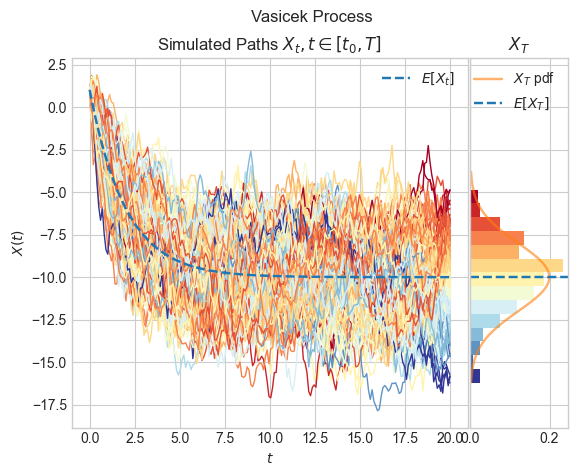

In [29]:
%pip install aleatory
from aleatory.processes import Vasicek
process = Vasicek(theta=0.5, mu=-10.0, sigma=2.0, initial=1.0, T=20.0)
process.draw(n=200, N=200, envelope=False, title='Vasicek Process')
import matplotlib.pyplot as plt
plt.show()

## Definition

The Vasicek model specifies that the instantaneous interest rate is defined by a stochastic process which can be defined by the following Stochastic Differential Equation (SDE)


\begin{equation}
dX_t = \theta (\mu - X_t) dt + \sigma dW_t, \quad t >0,
\end{equation}


with initial condition  $X_0 =x_0\in\mathbb{R}$, and where $W_t$ is a standard Brownian motion, and the three parameters are constants:

- $\theta>0$ : speed or mean reversion coefficient
- $\mu \in \mathbb{R}$ : long term mean
- $\sigma>0$ : volatility



In order to find the solution to this SDE, let us set the function $f(t,x) = x e^{\theta t}$. Then, Ito's formula implies


\begin{align*}
X_te^{\theta t} &= x_0 +\int_0^t X_s \theta e^{\theta s}ds + \int_0^t e^{\theta s}dX_s \\
& = x_0 + \int_0^t \left[ \theta X_s  e^{\theta s}  +\theta e^{\theta s}(\mu - X_s)\right] ds + \int_0^t e^{\theta s}\sigma dW_s\\
& = x_0 + \int_0^t \left[ \theta e^{\theta s}\mu\right] ds + \int_0^t e^{\theta s}\sigma dW_s\\
& = x_0 + \mu(e^{\theta t} - 1) + \int_0^t e^{\theta s}\sigma dW_s.
\end{align*}


Thus

\begin{equation}
X_t = x_0e^{-\theta t} +  \mu(1- e^{-\theta t})  + \sigma \int_0^t e^{-\theta (t-s)}dW_s.
\end{equation}

### Expectation and Variance

For each $t>0$, the conditional marginal $X_t|X_0$ from a Vacisek process satisfies

\begin{equation*}
\mathbf{E} [X_t ] = \mathbb{E}[X_t|X_0] = x_0e^{-\theta t} +  \mu(1- e^{-\theta t}),
\end{equation*}

and

\begin{equation*}
\mathbf{Var} [X_t ] = \mathbb{Var} [X_t |X_0] =  \frac{\sigma^2}{ 2\theta} (1- e^{-2\theta t}).
\end{equation*}

To obtain the expectation we simply use the linearity of the expectation and the fact that the Ito integral in equation (2) is a martingale. Similarly, for the variance we  use basic properties of the variance and the isometry property of the Ito integral.

### Python Implementation

So, for given $x_0, \theta>0, \mu, \sigma>0$ and $t,s>0$ You will implement the above formulas for the expectation, variance, and covariance as follows.

In [30]:
import numpy as np

def vasicek_mean(t: float, x0: float, theta: float, mu: float) -> float:
    """
    Compute the expectation E[X_t] of the Vasicek process.

    Parameters:
    -----------
    t     : time (t >= 0)
    x0    : initial value X_0
    theta : speed of mean reversion (theta > 0)
    mu    : long-term mean

    Returns:
    --------
    float : E[X_t]
    """
    return x0 * np.exp(-theta * t) + mu * (1 - np.exp(-theta * t))

def vasicek_variance(t: float, sigma: float, theta: float) -> float:
    """
    Compute the variance Var(X_t) of the Vasicek process.

    Parameters:
    -----------
    t     : time (t >= 0)
    sigma : volatility (sigma > 0)
    theta : speed of mean reversion (theta > 0)

    Returns:
    --------
    float : Var(X_t)
    """
    return (sigma**2 / (2.0 * theta)) * (1.0 - np.exp(-2.0 * theta * t))

def vasicek_covariance(t: float, s: float, x0: float, theta: float, mu: float, sigma: float) -> float:
    """
    Compute the covariance Cov(X_t, X_s) for a Vasicek process, assuming t >= s.
    If t < s is passed, the function will swap them internally.

    Cov(X_t, X_s) = e^{-theta (t - s)} Var(X_s).

    Parameters:
    -----------
    t, s  : two time points (t >= 0, s >= 0)
    x0    : initial value X_0 (not directly needed for covariance)
    theta : speed of mean reversion (theta > 0)
    mu    : long-term mean (not directly needed for covariance)
    sigma : volatility (sigma > 0)

    Returns:
    --------
    float : Cov(X_t, X_s)
    """
    # Ensure t >= s for formula consistency
    if s > t:
        s, t = t, s  # swap

    # Var(X_s)
    var_xs = vasicek_variance(s, sigma, theta)

    # e^{-theta (t - s)} * Var(X_s)
    return np.exp(-theta * (t - s)) * var_xs

if __name__ == "__main__":
    x0 = 0.05   # initial short rate
    theta = 1.0
    mu = 0.08
    sigma = 0.01
    t = 2.0
    s = 1.0

    mean_t = vasicek_mean(t, x0, theta, mu)
    var_t = vasicek_variance(t, sigma, theta)
    cov_ts = vasicek_covariance(t, s, x0, theta, mu, sigma)

    print(f"E[X_{t}]         = {mean_t}")
    print(f"Var(X_{t})       = {var_t}")
    print(f"Cov(X_{t}, X_{s}) = {cov_ts}")


E[X_2.0]         = 0.07593994150290162
Var(X_2.0)       = 4.908421805556329e-05
Cov(X_2.0, X_1.0) = 1.590461864017892e-05


### Marginal Distributions in Python

Knowing the distribution –with its corresponding parameters– of the marginal distributions allows us to reproduce them with `Python`.

One way to do this is by using the object  `norm`  from the library `scipy.stats`.  The next cell shows how to create $X_1$ using this method.

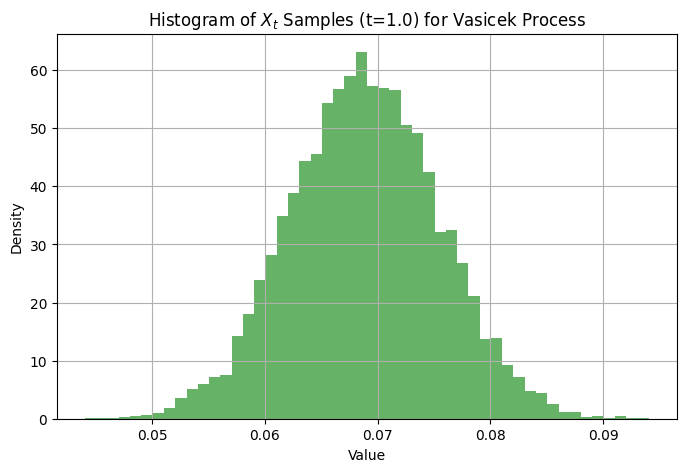

Mean of generated samples  = 0.0688423825339872
Analytical mean E[X_t]     = 0.06896361676485672
Sample variance            = 4.3326337355235644e-05
Analytical variance Var(X_t) = 4.3233235838169365e-05


In [31]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

# --- 1) Define parameters ---
x0    = 0.05   # Initial value X_0
theta = 1.0    # Speed of mean reversion (θ > 0)
mu    = 0.08   # Long-term mean (μ)
sigma = 0.01   # Volatility (σ > 0)
t     = 1.0    # Time at which we evaluate X_t (e.g., X_1)

# --- 2) Compute mean and variance for X_t in the Vasicek model ---
#     E[X_t]    = x0 e^{-θt} + μ(1 - e^{-θt})
#     Var(X_t)  = (σ^2 / (2θ)) * (1 - e^{-2θt})

mean_Xt = x0 * np.exp(-theta * t) + mu * (1 - np.exp(-theta * t))
var_Xt  = (sigma**2 / (2 * theta)) * (1 - np.exp(-2 * theta * t))

# Standard deviation is the square root of variance
std_Xt  = np.sqrt(var_Xt)

# --- 3) Draw samples from the normal distribution using scipy.stats.norm ---
#      X_t ~ Normal(mean_Xt, std_Xt^2)

num_samples = 10_000
X_samples   = norm.rvs(loc=mean_Xt, scale=std_Xt, size=num_samples)

# --- 4) Visualize the distribution ---
plt.figure(figsize=(8,5))
plt.hist(X_samples, bins=50, density=True, alpha=0.6, color='g')
plt.title(f"Histogram of $X_t$ Samples (t={t}) for Vasicek Process")
plt.xlabel("Value")
plt.ylabel("Density")
plt.grid(True)
plt.show()

print("Mean of generated samples  =", np.mean(X_samples))
print("Analytical mean E[X_t]     =", mean_Xt)
print("Sample variance            =", np.var(X_samples, ddof=1))
print("Analytical variance Var(X_t) =", var_Xt)

### Probability Density Functions

The probability density function (pdf) of the marginal distribution $X_t$ is given by the following expression
\begin{equation*}
f(x, t; \theta,  \mu, \sigma, x_0) = \dfrac{1}{ \frac{\sigma}{ \sqrt{2\theta}}  \sqrt{ (1- e^{-2\theta t})} \sqrt{2 \pi }}\exp\left\{ -\dfrac{1}{2} \left(\dfrac{x- [x_0e^{-\theta t} +  \mu(1- e^{-\theta t})] }{ \frac{\sigma}{ \sqrt{2\theta}}  \sqrt{ (1- e^{-2\theta t})}}\right)^2  \right\}, \qquad \forall x\in\mathbb{R}, t>0.
\end{equation*}

First we consider the process
`Vasicek(theta=1.0, mu=10.0, sigma=0.5, initial=1.0)` and plot the marginal density of $X_1$.
Note that the mean is still far from the long term mean $\mu=10$. Code it and plot the Graph of Distribution
'''
process = Vasicek(theta=1.0, mu=10.0, sigma=0.5, initial=1.0)
X_1 = process.get_marginal(t=1)
''''

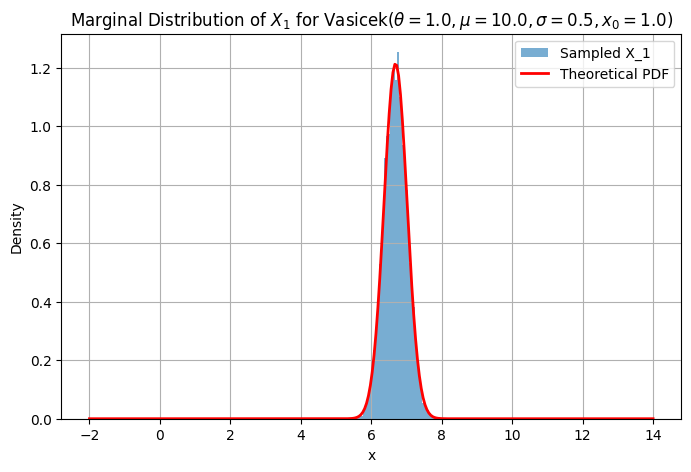

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

class Vasicek:
    def __init__(self, theta, mu, sigma, initial):
        """
        Initialize the Vasicek process with parameters:
            theta  : speed of mean reversion (> 0)
            mu     : long-term mean
            sigma  : volatility (> 0)
            initial: initial value X_0
        """
        self.theta = theta
        self.mu = mu
        self.sigma = sigma
        self.x0 = initial

    def get_marginal(self, t, size=1_000):
        """
        Draw random samples from the marginal distribution X_t ~ Normal(mean, var)
        where:
            mean = x0 * e^{-theta t} + mu * (1 - e^{-theta t})
            var  = (sigma^2 / (2 theta)) * (1 - e^{-2 theta t})

        Parameters
        ----------
        t    : time at which we want the distribution
        size : number of samples to generate

        Returns
        -------
        samples : a NumPy array of samples from X_t
        """
        mean = self.x0 * np.exp(-self.theta * t) + self.mu * (1 - np.exp(-self.theta * t))
        var  = (self.sigma**2 / (2 * self.theta)) * (1 - np.exp(-2 * self.theta * t))
        std  = np.sqrt(var)
        return norm.rvs(loc=mean, scale=std, size=size)

    def pdf(self, x, t):
        """
        Evaluate the PDF of X_t at point(s) x.

        f(x; t) = 1 / [ sigma / sqrt(2 theta) * sqrt(1 - e^{-2 theta t}) * sqrt(2 pi) ]
                  * exp{ -1/2 * [ x - (x0 e^{-theta t} + mu(1 - e^{-theta t})) ]^2
                          / [ sigma^2/(2 theta) * (1 - e^{-2 theta t}) ] }

        This is the same as the Normal PDF with mean and variance derived above.

        Parameters
        ----------
        x : float or array-like
        t : time at which we want the PDF

        Returns
        -------
        pdf_vals : the value(s) of the PDF at x
        """
        mean = self.x0 * np.exp(-self.theta * t) + self.mu * (1 - np.exp(-self.theta * t))
        var  = (self.sigma**2 / (2 * self.theta)) * (1 - np.exp(-2 * self.theta * t))
        std  = np.sqrt(var)
        return norm.pdf(x, loc=mean, scale=std)


# --- Usage Example ---

# 1) Instantiate the Vasicek process with the given parameters
process = Vasicek(theta=1.0, mu=10.0, sigma=0.5, initial=1.0)

# 2) Get samples of X_1 from its marginal distribution
X_1_samples = process.get_marginal(t=1.0, size=10000)

# 3) Plot the histogram of samples, along with the theoretical PDF

# Create a range of x-values over which we'll evaluate the PDF
x_vals = np.linspace(-2, 14, 300)
pdf_vals = process.pdf(x_vals, t=1.0)

plt.figure(figsize=(8, 5))
plt.hist(X_1_samples, bins=50, density=True, alpha=0.6, label="Sampled X_1")
plt.plot(x_vals, pdf_vals, 'r-', lw=2, label="Theoretical PDF")
plt.title("Marginal Distribution of $X_1$ for Vasicek($\\theta=1.0,\\mu=10.0,\\sigma=0.5, x_0=1.0$)")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()


**Plot Graphs** Dsitrbution in which Vary one at time ( sigma,mu,theta ,t ) . Vary one value taking  initial values of sigma,mu,theta,t

### Varying Sigma

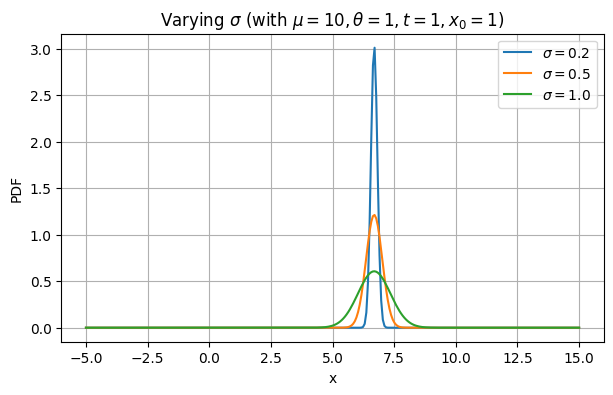

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Fixed parameters
x0    = 1.0
mu    = 10.0
theta = 1.0
t     = 1.0

# Values of sigma to try
sigma_values = [0.2, 0.5, 1.0]

# Prepare a range of x-values over which to plot the PDFs
x_vals = np.linspace(-5, 15, 300)

plt.figure(figsize=(7,4))

for sigma in sigma_values:
    # Mean and variance of X_t
    mean = x0 * np.exp(-theta * t) + mu * (1 - np.exp(-theta * t))
    var  = (sigma**2 / (2 * theta)) * (1 - np.exp(-2 * theta * t))
    std  = np.sqrt(var)

    # Evaluate the normal PDF
    pdf_vals = norm.pdf(x_vals, loc=mean, scale=std)

    plt.plot(x_vals, pdf_vals, label=f"$\\sigma={sigma}$")

plt.title(r"Varying $\sigma$ (with $\mu=10, \theta=1, t=1, x_0=1$)")
plt.xlabel("x")
plt.ylabel("PDF")
plt.legend()
plt.grid(True)
plt.show()


### Varying mew

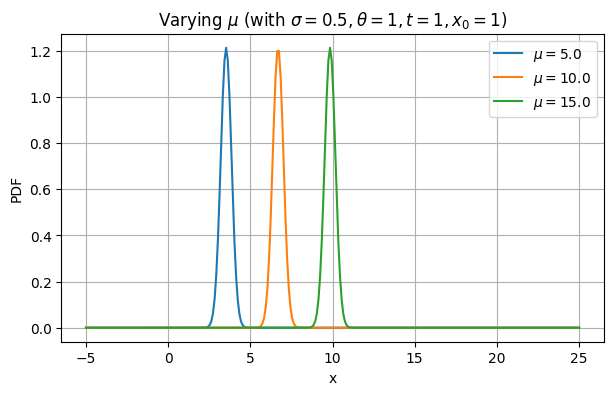

In [34]:
# Fixed parameters
x0    = 1.0
sigma = 0.5
theta = 1.0
t     = 1.0

# Values of mu to try
mu_values = [5.0, 10.0, 15.0]

x_vals = np.linspace(-5, 25, 300)

plt.figure(figsize=(7,4))

for mu in mu_values:
    mean = x0 * np.exp(-theta * t) + mu * (1 - np.exp(-theta * t))
    var  = (sigma**2 / (2 * theta)) * (1 - np.exp(-2 * theta * t))
    std  = np.sqrt(var)

    pdf_vals = norm.pdf(x_vals, loc=mean, scale=std)

    plt.plot(x_vals, pdf_vals, label=f"$\\mu={mu}$")

plt.title(r"Varying $\mu$ (with $\sigma=0.5, \theta=1, t=1, x_0=1$)")
plt.xlabel("x")
plt.ylabel("PDF")
plt.legend()
plt.grid(True)
plt.show()

### Varying theta

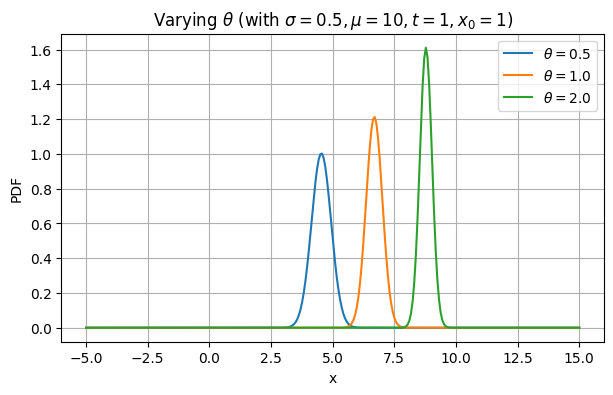

In [35]:
# Fixed parameters
x0    = 1.0
sigma = 0.5
mu    = 10.0
t     = 1.0

# Values of theta to try
theta_values = [0.5, 1.0, 2.0]

x_vals = np.linspace(-5, 15, 300)

plt.figure(figsize=(7,4))

for theta in theta_values:
    mean = x0 * np.exp(-theta * t) + mu * (1 - np.exp(-theta * t))
    var  = (sigma**2 / (2 * theta)) * (1 - np.exp(-2 * theta * t))
    std  = np.sqrt(var)
    
    pdf_vals = norm.pdf(x_vals, loc=mean, scale=std)

    plt.plot(x_vals, pdf_vals, label=f"$\\theta={theta}$")

plt.title(r"Varying $\theta$ (with $\sigma=0.5, \mu=10, t=1, x_0=1$)")
plt.xlabel("x")
plt.ylabel("PDF")
plt.legend()
plt.grid(True)
plt.show()

### Varying t

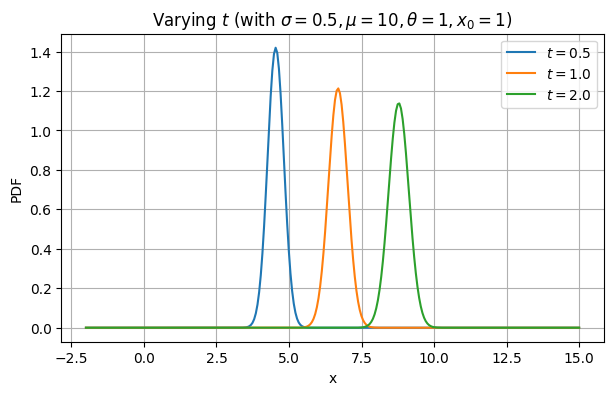

In [36]:
# Fixed parameters
x0    = 1.0
sigma = 0.5
mu    = 10.0
theta = 1.0

# Values of t to try
t_values = [0.5, 1.0, 2.0]

x_vals = np.linspace(-2, 15, 300)

plt.figure(figsize=(7,4))

for t in t_values:
    mean = x0 * np.exp(-theta * t) + mu * (1 - np.exp(-theta * t))
    var  = (sigma**2 / (2 * theta)) * (1 - np.exp(-2 * theta * t))
    std  = np.sqrt(var)
    
    pdf_vals = norm.pdf(x_vals, loc=mean, scale=std)

    plt.plot(x_vals, pdf_vals, label=f"$t={t}$")

plt.title(r"Varying $t$ (with $\sigma=0.5, \mu=10, \theta=1, x_0=1$)")
plt.xlabel("x")
plt.ylabel("PDF")
plt.legend()
plt.grid(True)
plt.show()

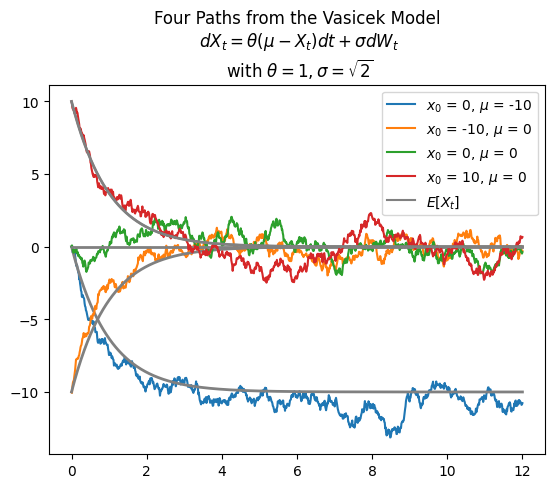

In [37]:
from aleatory.processes import Vasicek
import matplotlib.pyplot as plt
import numpy as np

process = Vasicek(theta=1.0,mu=-10.0,sigma=np.sqrt(2),initial=0.0,T=12.0)
path = process.simulate(n=1000, N=1)
ts = process.times
exp = process.marginal_expectation(ts)
plt.plot(ts, path[0], label= f'$x_0$ = 0, $\mu$ = -10')
plt.plot(ts, exp, color='grey',linewidth=2)

for x0 in [-10.0, 0.0, 10.0]:
    process = Vasicek(theta=1.0,mu=0.0,sigma=np.sqrt(2),initial=x0,T=12.0)
    path = process.simulate(n=1000, N=1)
    plt.plot(ts, path[0], label= f'$x_0$ = {x0:.0f}, $\mu$ = 0')
    exp = process.marginal_expectation(ts)
    plt.plot(ts, exp, color='grey', linewidth=2)
plt.plot(ts, exp, color='grey', label=f'$E[X_t]$')
plt.legend()
plt.title('Four Paths from the Vasicek Model\n $dX_t = \\theta(\mu - X_t) dt + \sigma dW_t$\n with $\\theta = 1, \sigma = \sqrt{2}$')
plt.show()

**Simulation**

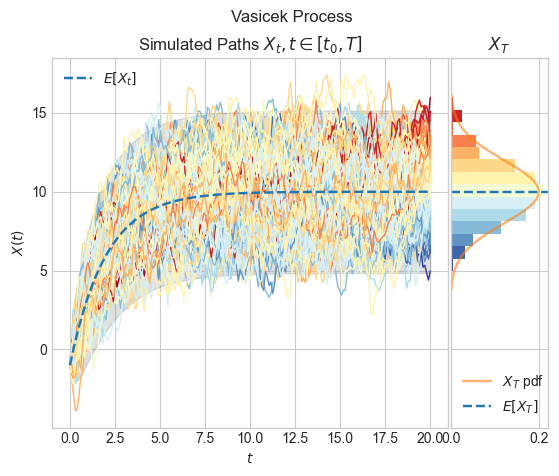

In [38]:
process = Vasicek(theta=0.5, mu=10.0, sigma=2.0, initial=-1.0, T=20.0)
fig = process.draw(n=200, N=200, envelope=True)

#### The parameter $\theta$ determines the Speed of Convergence

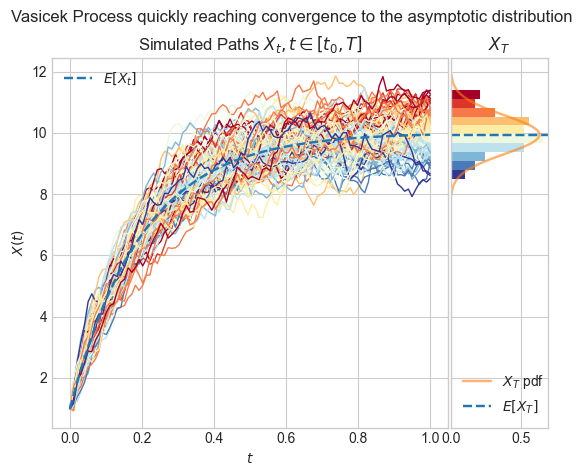

In [39]:
process = Vasicek(theta=5.0, mu=10.0, sigma=2.0, initial=1.0, T=1.0)
fig = process.draw(n=100, N=100, title='Vasicek Process quickly reaching convergence to the asymptotic distribution')

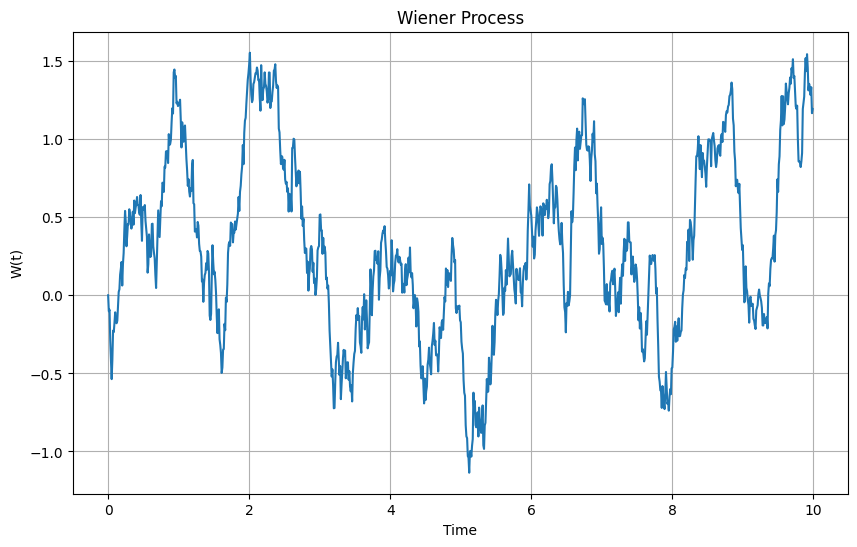

In [40]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_wiener_process(num_points, dt):
    # Generate the increments using normal distribution
    increments = np.random.normal(0, np.sqrt(dt), num_points - 1)

    # The Wiener process starts at zero, so we concatenate a 0 at the beginning
    W = np.concatenate([[0], np.cumsum(increments)])

    return W

# Simulation parameters
num_points = 1000
dt = 0.01

W = simulate_wiener_process(num_points, dt)

# Plotting the Wiener process
plt.figure(figsize=(10, 6))
plt.plot(np.arange(num_points) * dt, W)
plt.title('Wiener Process')
plt.xlabel('Time')
plt.ylabel('W(t)')
plt.grid(True)
plt.show()

### Plot different no. of paths by varying parameter and time interval!

In [41]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_vasicek(theta, mu, sigma, x0, T, dt=0.01, n_paths=5):
    """
    Simulate the Vasicek process:
        dX_t = theta * (mu - X_t) dt + sigma dW_t,
    using a simple Euler–Maruyama scheme.

    Parameters
    ----------
    theta   : speed of mean reversion (float)
    mu      : long-term mean (float)
    sigma   : volatility (float)
    x0      : initial value X_0 (float)
    T       : end time (float), with start time assumed 0
    dt      : time step size (float)
    n_paths : how many independent sample paths to simulate (int)

    Returns
    -------
    t_grid : np.ndarray of shape (N+1,)
        Times from 0 to T in steps of dt.
    X      : np.ndarray of shape (n_paths, N+1)
        Simulated paths. Each row is a path over time.
    """
    # Number of time steps
    N = int(np.ceil(T / dt))
    
    # Create a time grid
    t_grid = np.linspace(0, N*dt, N+1)

    # Allocate array for the paths (n_paths x (N+1))
    X = np.zeros((n_paths, N+1))
    
    # Set initial values
    X[:, 0] = x0

    # Simulate paths
    for i in range(N):
        # dW ~ sqrt(dt)*N(0,1)
        dW = np.sqrt(dt) * np.random.normal(0, 1, size=n_paths)
        # Euler–Maruyama update:
        # X_{t+dt} = X_t + theta*(mu - X_t)*dt + sigma*dW
        X[:, i+1] = X[:, i] + theta * (mu - X[:, i]) * dt + sigma * dW
    
    return t_grid, X


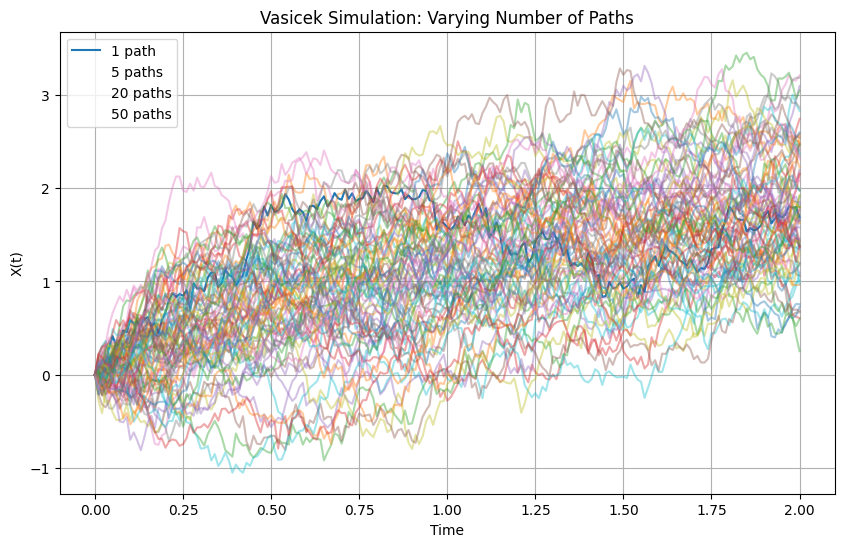

In [42]:
theta = 1.0
mu    = 2.0
sigma = 1.0
x0    = 0.0
T     = 2.0
dt    = 0.01

plt.figure(figsize=(10,6))

for n_paths in [1, 5, 20, 50]:
    t_grid, X = simulate_vasicek(theta, mu, sigma, x0, T, dt=dt, n_paths=n_paths)
    # Plot only the first path if n_paths==1 to keep it simple
    if n_paths == 1:
        plt.plot(t_grid, X[0,:], label=f"{n_paths} path")
    else:
        for i in range(n_paths):
            plt.plot(t_grid, X[i,:], alpha=0.4)
        plt.plot([], [], ' ', label=f"{n_paths} paths")  # empty handle for legend

plt.title("Vasicek Simulation: Varying Number of Paths")
plt.xlabel("Time")
plt.ylabel("X(t)")
plt.grid(True)
plt.legend()
plt.show()


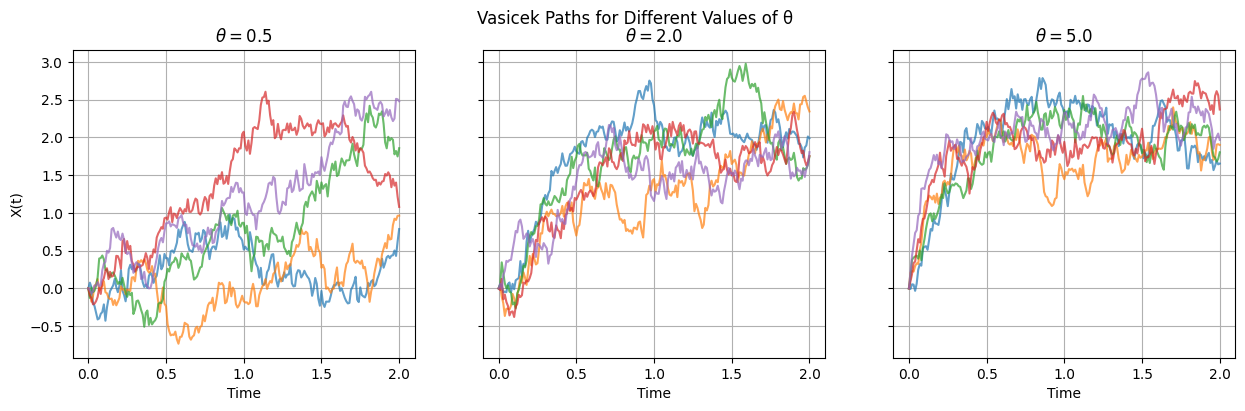

In [43]:
theta_values = [0.5, 2.0, 5.0]
mu    = 2.0
sigma = 1.0
x0    = 0.0
T     = 2.0
dt    = 0.01
n_paths = 5

fig, axes = plt.subplots(1, len(theta_values), figsize=(15,4), sharey=True)

for ax, th in zip(axes, theta_values):
    t_grid, X = simulate_vasicek(th, mu, sigma, x0, T, dt=dt, n_paths=n_paths)
    for i in range(n_paths):
        ax.plot(t_grid, X[i, :], alpha=0.7)
    ax.set_title(rf"$\theta = {th}$")
    ax.set_xlabel("Time")
    ax.grid(True)

axes[0].set_ylabel("X(t)")
fig.suptitle("Vasicek Paths for Different Values of θ")
plt.show()

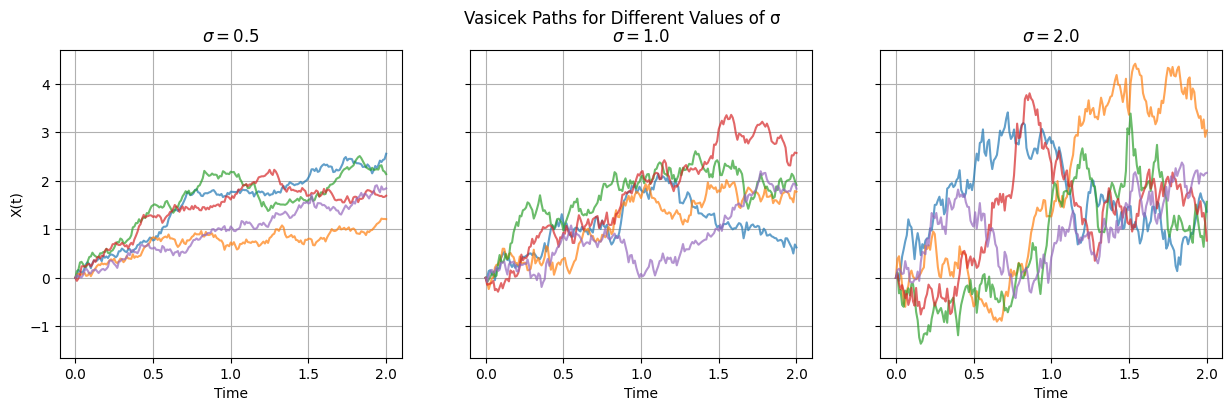

In [44]:
sigma_values = [0.5, 1.0, 2.0]
theta = 1.0
mu    = 2.0
x0    = 0.0
T     = 2.0
dt    = 0.01
n_paths = 5

fig, axes = plt.subplots(1, len(sigma_values), figsize=(15,4), sharey=True)

for ax, sig in zip(axes, sigma_values):
    t_grid, X = simulate_vasicek(theta, mu, sig, x0, T, dt=dt, n_paths=n_paths)
    for i in range(n_paths):
        ax.plot(t_grid, X[i, :], alpha=0.7)
    ax.set_title(rf"$\sigma = {sig}$")
    ax.set_xlabel("Time")
    ax.grid(True)

axes[0].set_ylabel("X(t)")
fig.suptitle("Vasicek Paths for Different Values of σ")
plt.show()


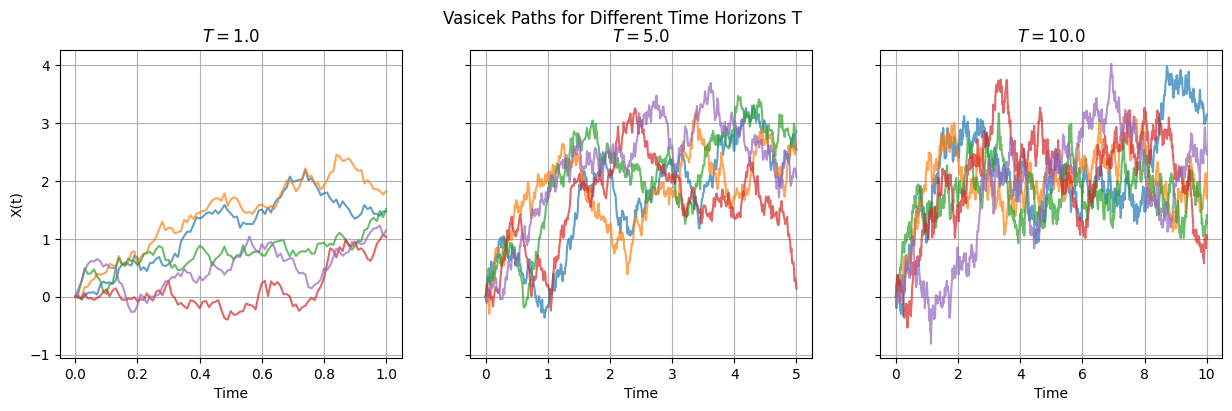

In [45]:
T_values = [1.0, 5.0, 10.0]
theta = 1.0
mu    = 2.0
sigma = 1.0
x0    = 0.0
dt    = 0.01
n_paths = 5

fig, axes = plt.subplots(1, len(T_values), figsize=(15,4), sharey=True)

for ax, T_ in zip(axes, T_values):
    t_grid, X = simulate_vasicek(theta, mu, sigma, x0, T_, dt=dt, n_paths=n_paths)
    for i in range(n_paths):
        ax.plot(t_grid, X[i, :], alpha=0.7)
    ax.set_title(rf"$T = {T_}$")
    ax.set_xlabel("Time")
    ax.grid(True)

axes[0].set_ylabel("X(t)")
fig.suptitle("Vasicek Paths for Different Time Horizons T")
plt.show()
